<a href="https://colab.research.google.com/github/Darshan2104/CE_135_Darshan_Tank_ML/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import scikit-learn dataset library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [6]:
#load data of csv file and encode it 
data = pd.read_csv("/content/drive/MyDrive/L3/PracticeDataSets/Dataset2.csv");
labels = preprocessing.LabelEncoder()
for fe in data:
  print(fe)
  print(list(data[fe]))
  data[fe] =labels.fit_transform(data[fe])
  print(list(data[fe]))

Outlook
['R', 'R', 'O', 'S', 'S', 'S', 'O', 'R', 'R', 'S', 'R', 'O', 'O', 'S']
[1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2]
Temp
['H', 'H', 'H', 'M', 'M', 'M', 'C', 'C', 'C', 'M', 'M', 'M', 'H', 'M']
[1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2]
Wind
['F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T']
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
Humidity
['Normal', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Normal', 'Normal', 'Low', 'High', 'High', 'Low', 'Normal', 'Normal']
[2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2]
Class
['N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [7]:
fe=tuple(zip(data['Outlook'],data['Temp'],data['Wind'],data['Humidity']))
print("Features:",fe)

Features: ((1, 1, 0, 2), (1, 1, 1, 0), (0, 1, 0, 2), (2, 2, 0, 2), (2, 2, 0, 2), (2, 2, 1, 1), (0, 0, 1, 2), (1, 0, 0, 2), (1, 0, 0, 1), (2, 2, 0, 0), (1, 2, 1, 0), (0, 2, 1, 1), (0, 1, 0, 2), (2, 2, 1, 2))


In [9]:
#training of model with train test division 90%-10%
from sklearn.model_selection import train_test_split
#random_state is : 63
data_train, data_test, target_train, target_test = train_test_split(fe,data['Class'], test_size = 0.10, random_state =63)

In [10]:
model=MultinomialNB()
model.fit(data_train, target_train)
target_pred = model.predict(data_test)

In [11]:
#accuracy calculation for random_state = 63
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(target_test, target_pred))

Accuracy: 1.0


In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 1.0
recall: 1.0


In [13]:
#Predict Output
#input Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’
predicted= model.predict([[1,2,2,0]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


In [14]:
#input Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’
predicted= model.predict([[2,0,0,1]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


In [15]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

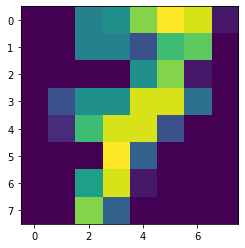

In [16]:
digits = load_digits()
plt.figure(1, figsize=(4, 4))
plt.imshow(digits.images[7])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(digits.data,
 digits.target, test_size = 0.35, random_state = 63)

In [18]:
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(data_train, target_train)
#Predict the response for test dataset
target_pred = gnb.predict(data_test)


In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(target_test, target_pred))

Accuracy: 0.848966613672496


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_pred)

array([[59,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 0, 53,  1,  0,  0,  0,  1,  1, 14,  0],
       [ 0,  2, 54,  2,  1,  0,  1,  0,  4,  2],
       [ 0,  0,  2, 47,  0,  4,  0,  2,  6,  0],
       [ 0,  1,  0,  0, 58,  0,  0,  6,  1,  0],
       [ 0,  0,  0,  1,  0, 52,  1,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 54,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0, 60,  0,  0],
       [ 0,  3,  1,  1,  0,  3,  0,  1, 54,  0],
       [ 2,  4,  0,  2,  0,  3,  0,  6,  8, 43]])

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(target_test, target_pred,average=None)
recall = recall_score(target_test, target_pred,average=None)
print('precision per feature:'+ str(precision))
print('recall per feature:'+ str(recall))
final_precision = precision.mean()
final_recall =recall.mean()
print('\n\nprecision: {}'.format(final_precision))
print('recall: {}'.format(final_recall))

precision per feature:[0.96721311 0.84126984 0.91525424 0.88679245 0.95081967 0.82539683
 0.94736842 0.75949367 0.61363636 0.95555556]
recall per feature:[0.96721311 0.75714286 0.81818182 0.7704918  0.87878788 0.9122807
 0.98181818 0.96774194 0.85714286 0.63235294]


precision: 0.8662800154800863
recall: 0.8543154089521107
